# Predicting Liver Patients with Machine Learning Algorithm

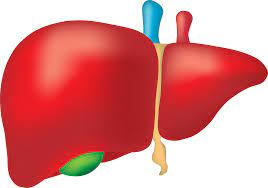

### Data Set Information

This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from test samples in North East of Andhra Pradesh, India. 

'is_patient' is a class label used to divide into groups(liver patient or not). 

This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

### Attribute Information

- `age` Age of the patient


- `gender` Gender of the patient


- `tot_bilirubin` Total Bilirubin


- `direct_bilirubin` Direct Bilirubin


- `alkphos` Alkaline Phosphotase


- `sgpt Alamine` Aminotransferase


- `sgot Aspartate` Aminotransferase


- `tot_proteins` Total Protiens


- `albumin` Albumin


- `ag_ratio` Albumin and Globulin Ratio


- `is_patient` Selector field used to split the data into two sets (labeled by the experts)


### Acknowledgements
Sincere thanks to the UCI Machine Learning Repository as this data was elicited from the source.

In [1]:
#pip install opendatasets --quiet

Note: you may need to restart the kernel to use updated packages.


In [195]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#getting the dataset from Kaggle using opendatasets module
#import opendatasets as od

#od.download('https://www.kaggle.com/jeevannagaraj/indian-liver-patient-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: donatusprince
Your Kaggle Key: ········


100%|██████████| 7.65k/7.65k [00:00<00:00, 2.51MB/s]

In [150]:
# importing neccessary data exploratory libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [151]:
df = pd.read_csv('dataset/indian_liver_data.csv')

In [152]:
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [153]:
# Retrieve the colunmn information
df.columns.values

array(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin',
       'tot_proteins', 'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos',
       'is_patient'], dtype=object)

In [154]:
# Retrieve the full information regarding the features and response, in order to verify 
# if the values are unique or are there any missing data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [155]:
# checking the shape of the dataset
df.shape

(583, 11)

What we can see here is that the data contains (583 rows by 11 columns). This means the that df contains 583 observations + 10 features + 1 response (or target) variable. 

Furthermore, the dataset consists of 5 Floats, 5 integers and 1 object. 

Therefore, the goal is to convert the object to numerical values so we can apply machine learning (ML) algorithms. 

We also notice that the `alkphos` column (Alkaline Phosphotase) contains missing values (Nan).

In [156]:
# We can performing some simple statistical inferences to get a good feel of the data
# The target variable (is_patient) was dropped
df.drop('is_patient', axis=1 ).describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


From the descriptive statistics above, we notice that the minimum age is 4 and the maximum is 90. Based on the information on this dataset, it was suggested that anyone above the age of 85 should be treated as 90. 

Lastly, it would be a good idea to figure out the ranges of healthy patients in order to figure out where each patient lies.

In [157]:
# performing some additional statistics to include all
df.describe(include ='all')

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [158]:
# Defining a function that creates a table of missing values and their percentages in 
# descending order

def missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    percentage_final = (round(percentage, 2) * 100)
    total_percent = pd.concat(objs=[total, percentage_final], axis = 1, keys=['Total', '%'])
    return total_percent

In [159]:
# Find the total count and % of missing values 
missing_values(df)

,Total,%
alkphos,4,1.0
age,0,0.0
gender,0,0.0
tot_bilirubin,0,0.0
direct_bilirubin,0,0.0
tot_proteins,0,0.0
albumin,0,0.0
ag_ratio,0,0.0
sgpt,0,0.0
sgot,0,0.0


It appears that there are only 4 missing values in the feature column `alkphos` (Alkaline Phosphotase), which equates to 1% of the the entire data.

In [160]:
# Handling the missing data in the dataset
df.fillna(method='bfill', inplace=True)

In [161]:
# confirming if missing values still exist in the dataset
missing_values(df)

,Total,%
age,0,0.0
gender,0,0.0
tot_bilirubin,0,0.0
direct_bilirubin,0,0.0
tot_proteins,0,0.0
albumin,0,0.0
ag_ratio,0,0.0
sgpt,0,0.0
sgot,0,0.0
alkphos,0,0.0


All missing values have been handled accordingly

In [162]:
# figuring out correlations using heatmap
df.drop('is_patient', axis=1).corr().style.background_gradient(cmap='coolwarm')

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos
age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.218511
tot_bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.207954
direct_bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.201974
tot_proteins,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.236543
albumin,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.004714
ag_ratio,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.071585
sgpt,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233764
sgot,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.688138
alkphos,-0.218511,-0.207954,-0.201974,-0.236543,-0.004714,-0.071585,0.233764,0.688138,1.000000


Based on the correlative results, we find some interesting results directly.


-Positive correlations:

Total Bilirubin and Direct Bilirubin (vice-versa)

Alamine Aminotransferase and Aspartate Aminotransferase (vice-versa)

Total Protein and Albumin (vice-versa)

Albumin and Globulin Ratio and Albumin (vice-versa)

Total Protein and Albumin and Globulin Ration (vice-versa)


-Negative correlations:

Total Protein and age (vice-versa)

Albumin and age (vice-versa)

Albumin and Globulin Ration and age (vice-versa)

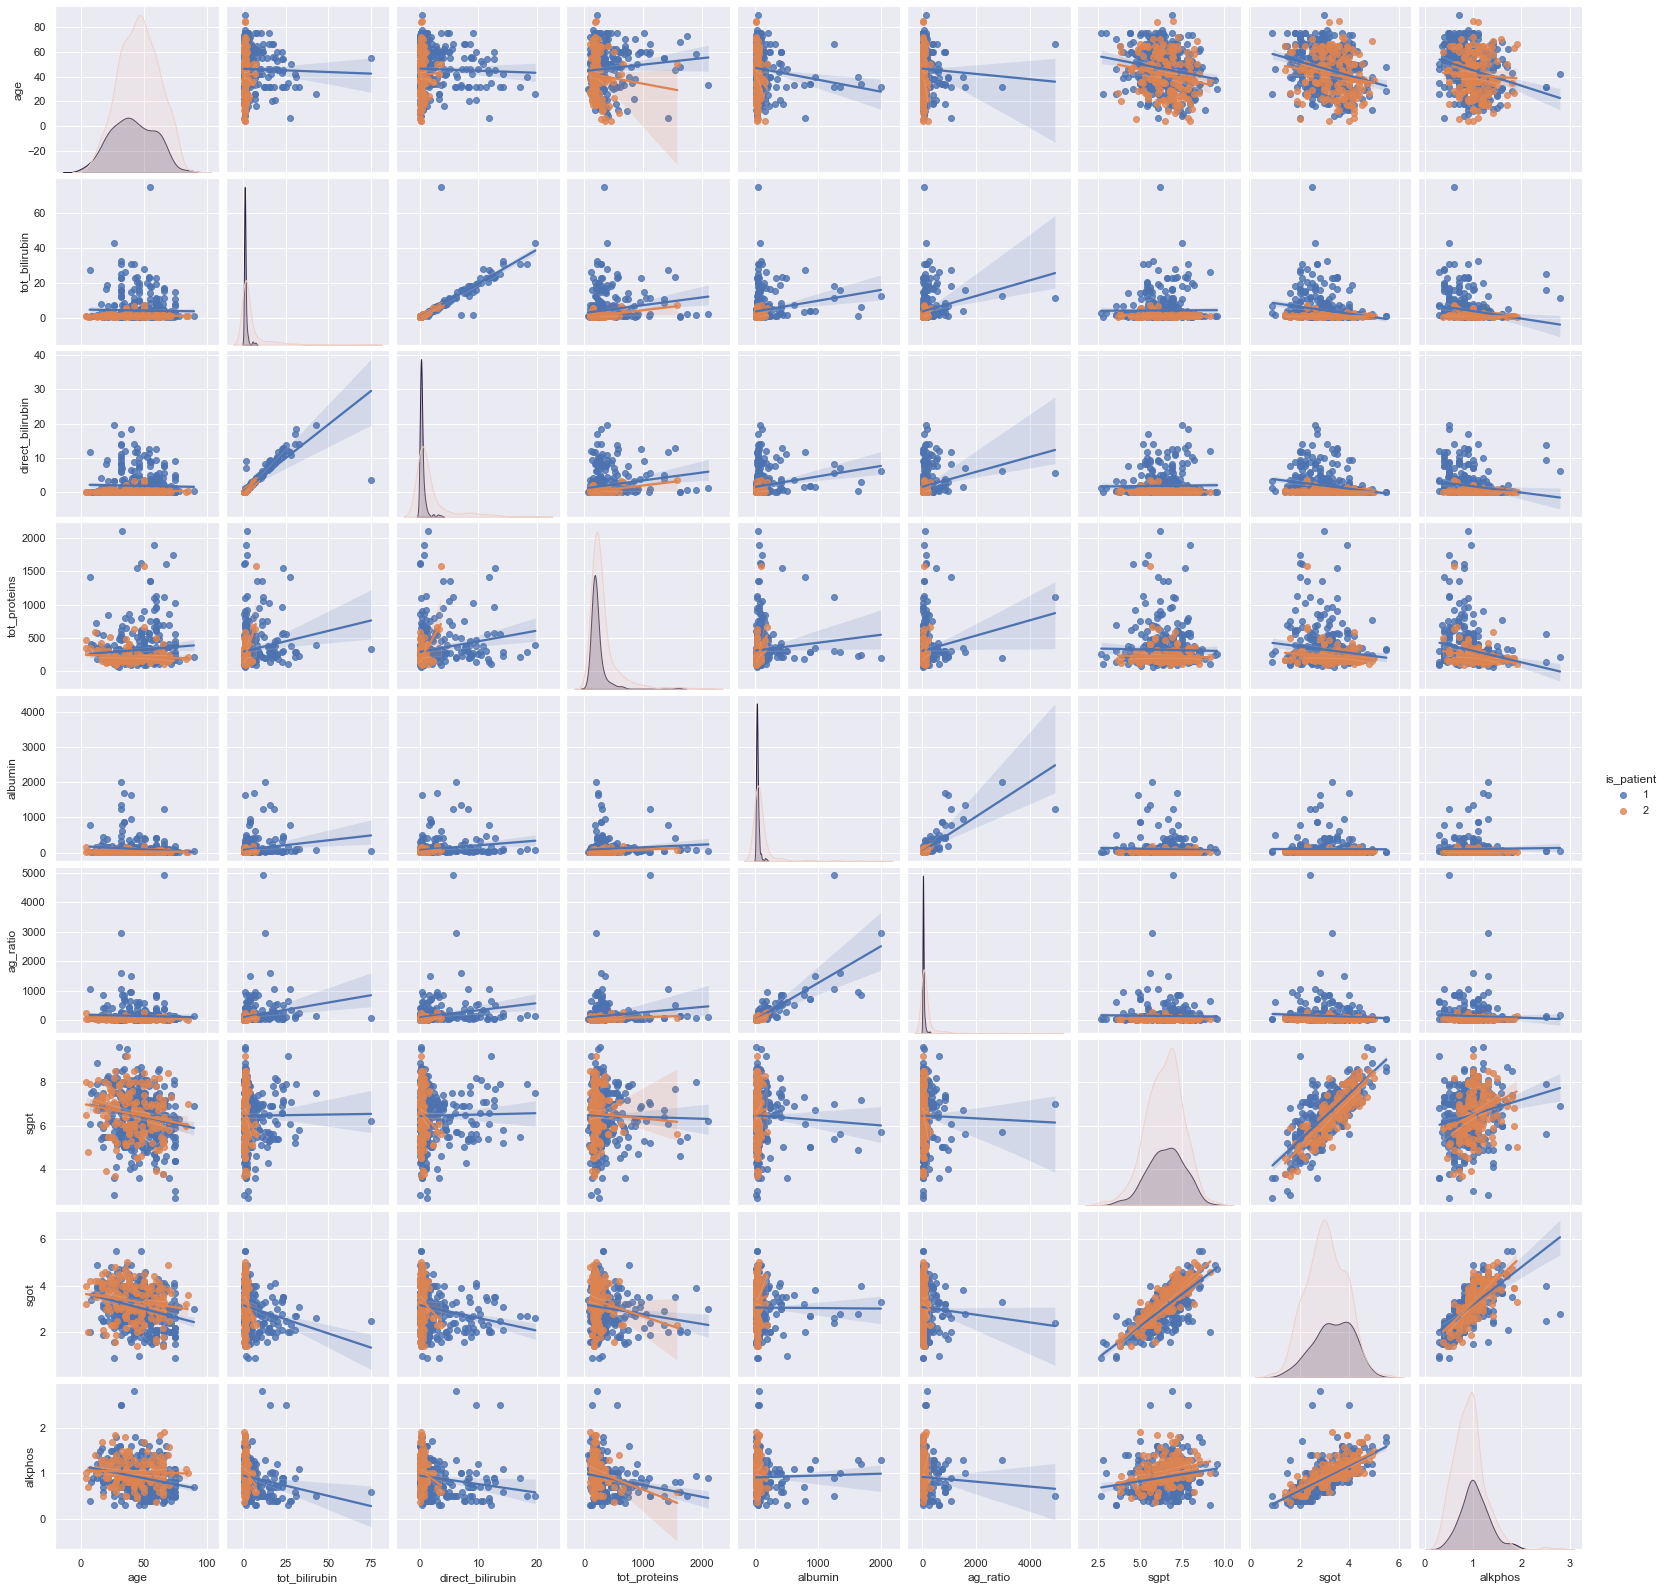

In [163]:
# Correlation between features using seaborn pairplotBased on the correlative pair plots, we find some interesting results directly.
sns.set()
sns.pairplot(df, hue='is_patient', kind='reg');

In [164]:
# mapping the is_patient column to be 1 for without liver disease and 0 for with liver disease
df['is_patient'] = df['is_patient'].map({1: 0, 2: 1})

,gender,is_patient
0,Female,50
1,Male,117


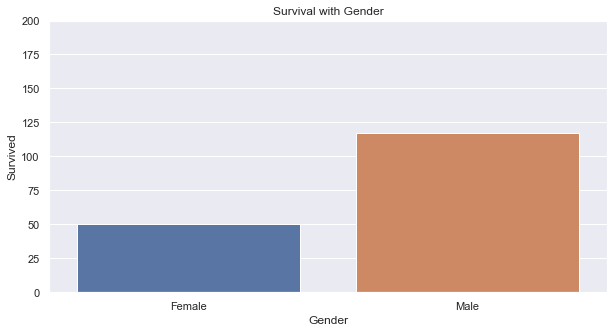

In [165]:
# Creating a table for Dataset (with and without liver disease) and gender
df_liver_Gender = round(df[['gender', 'is_patient']].groupby(['gender'], as_index=False)
                        .agg(np.sum), 3)

# Generate plot to determine the effect of gender on the dataset (target feature)
# Figure configuration

plt.figure(figsize=(10,5))

sns.barplot(x="gender", y="is_patient", data=df_liver_Gender, ci=None)
plt.title("Survival with Gender")
plt.ylabel('Survived')
plt.xlabel('Gender')
plt.ylim(0, 200);

df_liver_Gender

In [166]:
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [167]:
df.tail()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,1
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,0
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,0
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,0
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,1


### Can high Total Bilirubin and Direct Bilirubin cause liver problem?

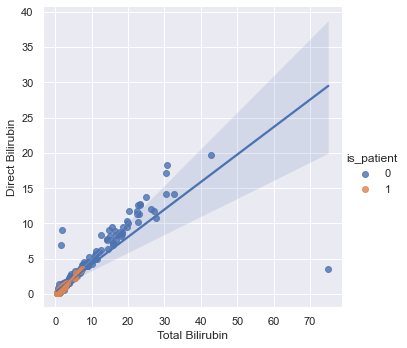

In [168]:
sns.lmplot(hue='is_patient', data=df, x='tot_bilirubin', y='direct_bilirubin')
plt.ylabel('Direct Bilirubin')
plt.xlabel('Total Bilirubin');

Patients without bad liver is observed to have very low Total Bilirubin and Direct Bilirubin because lower than normal bilirubin levels are usually not a concern. 

Elevated levels of normal bilirubin may indicate liver damage or disease. 

Higher than normal levels of direct bilirubin in your blood may indicate your liver isn't clearing bilirubin properly.

### What is the relationship of Total Protein and Age with Gender amongst patients?

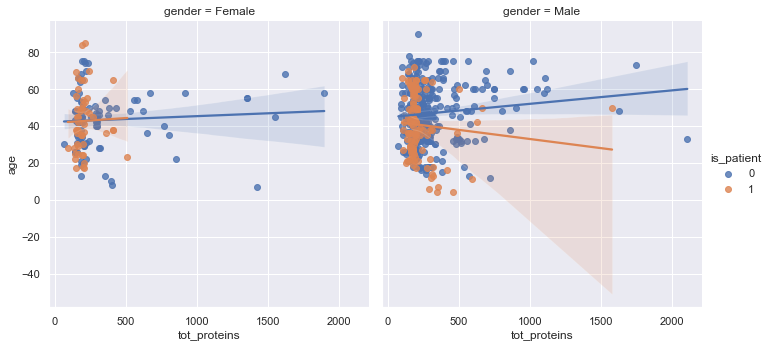

In [169]:
sns.lmplot(hue='is_patient', data=df, x='tot_proteins', y='age', 
           col='gender');

Protein deficiency is often associated with liver disease. The principal cause of protein deficiency is decreased dietary intake. 

#### Hypothesis Testing
Before delving into more complicated models, let's use a simple hyopthesis test to estimate the percentage of patients with liver disease.

In [238]:
# Create a new dataframe for the simple hypothesis testing 
df_liver_hyp = df.copy()
df_liver_hyp.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [239]:
# Create a 'Hypothesis' column and set that equal to 0
df_liver_hyp['hypothesis'] = 1

# Our hypothesis is that if the patients have liver disease then set the hypothesis column to 1
df_liver_hyp.loc[df_liver_hyp['is_patient'] == 0, 'hypothesis'] = 0

df_liver_hyp.tail()

# Next, to check if our hypothesis is correct I will create another column called Result and set that equal to 0
#df_liver_hyp['Result'] = 0

# If the Dataset column agrees with our Hypothesis column, I am going to update the 'Result' column by 1.
#df_liver_hyp.loc[df_liver_hyp['Dataset'] == df_liver_hyp['Hypothesis'], 'Result'] = 1

#df_liver_hyp.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient,hypothesis
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,1,1
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,0,0
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,0,0
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,0,0
582,38,1,1.0,0.3,216,21,24,7.3,4.4,1.50,1,1


In [246]:
# I will now find the percentage of passengers that have liver disease
round(df_liver_hyp['hypothesis'].value_counts(normalize=True) * 100, 1)

0    71.4
1    28.6
Name: hypothesis, dtype: float64

Based on the simple hypothesis test above, we find that ~ 71% of patients have liver disease.

Now we can proceed to using more sophisticated machine learning models to estimate and predict liver disease in df_liver using supervised and un-supervised models. 

I will also be printing out the percent score and accuracy of each model.

In [170]:
# Machine learning libraries in sklearn

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [171]:
# mapping the gender column to be 0 for female and 1 for male
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

In [172]:
# seperaing the dataset into feature and target variables
X = df.drop('is_patient', axis=1)
y = df['is_patient']

Cross val K-fold cross validation: randomly splits the training set into (n_splits) 10 distinct subsets called folds, then it trains and evaluates the models 10 times, picking a different fold for evaluation every time and training on the other 9 folds.

In [173]:
#Cross validate model with Kfold stratified 
K_fold = StratifiedKFold(n_splits=10)

In [174]:
# Scaling  the data and assigning it to X
scaler=MinMaxScaler()
scaled_values=scaler.fit_transform(X)
X.loc[:,:] = scaled_values

In [175]:
# Creating the Train and Test sets

# Splitting the train and test into 70% training and 30% testing
X_train, X_test, y_train, y_test=train_test_split(X,y,stratify=y, test_size=0.3,
                                                  random_state=42)


# Find the shape of all sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((408, 10), (408,), (175, 10), (175,))

#### Logistic Regression
Logistic regression models the probabilities for classification problems with two possible outcomes. 

Furthermore, this models is an extension of the linear regression model but for classification problems.

In [187]:
# Logistic Regression
model_logreg = LogisticRegression()
model_logreg.fit(X_train,y_train)
y_pred = model_logreg.predict(X_test)

scores = cross_val_score(model_logreg, X_train, y_train, cv=K_fold, n_jobs=4, scoring='accuracy')

print(scores)

score_logreg = round(np.mean(scores) * 100, 3)
print("Score: {}".format(score_logreg))

acc_logreg = round(accuracy_score(y_test, y_pred) * 100, 3)
print("Accuracy: {}".format(acc_logreg))


[0.73170732 0.73170732 0.70731707 0.68292683 0.70731707 0.68292683
 0.70731707 0.70731707 0.725      0.725     ]
Score: 71.085
Accuracy: 72.0


#### KNeighborsClassifier

This is a non-parametric test that searches for the K nearest measurements of the training data and draws a Euclidean distance. It then votes based on that information of how to classify the data.

In [197]:
# K-Neighbors Classifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

scores = cross_val_score(model_knn, X_train, y_train, cv=K_fold, n_jobs=4, scoring='accuracy')

print(scores)

score_knn = round(np.mean(scores) * 100, 3)
print("Score: {}".format(score_knn))

acc_knn = round(accuracy_score(y_test, y_pred) * 100, 3)
print("Accuracy: {}".format(acc_knn))

[0.73170732 0.70731707 0.70731707 0.58536585 0.56097561 0.75609756
 0.63414634 0.68292683 0.725      0.6       ]
Score: 66.909
Accuracy: 65.143


#### Multi-Layer Perceptron Classifier

MLP classifier relies on an underlying Neural Network to perform the task of classification.

In [196]:
model_MLP = MLPClassifier()
model_MLP.fit(X_train, y_train)
y_pred = model_MLP.predict(X_test)

scores = cross_val_score(model_MLP, X_train, y_train, cv=K_fold, n_jobs=4, scoring='accuracy' )

print(scores)
score_MLP = round(np.mean(scores) * 100, 3)
print("Score: {}".format(score_MLP))
acc_MLP = round(accuracy_score(y_test, y_pred) * 100, 3)
print("Accuracy: {}".format(acc_MLP))


[0.73170732 0.73170732 0.68292683 0.63414634 0.70731707 0.56097561
 0.73170732 0.70731707 0.725      0.75      ]
Score: 69.628
Accuracy: 71.429


#### Decision Tree Classifier

The data is continously split according to a certain parameter, in this case we are basing it on the features.

In [203]:
# Decision Tree Classifer
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)
y_pred = model_dtc.predict(X_test)

scores = cross_val_score(model_dtc, X_train, y_train, cv=K_fold, n_jobs=4, scoring='accuracy')

print(scores)

score_dtc = round(np.mean(scores) * 100, 3)
print("Score: {}".format(score_dtc))
acc_dtc = round(np.mean(accuracy_score(y_test, y_pred)) * 100, 3)
print("Accuracy: {}".format(acc_dtc))

[0.70731707 0.70731707 0.73170732 0.6097561  0.6097561  0.58536585
 0.73170732 0.68292683 0.65       0.675     ]
Score: 66.909
Accuracy: 62.857


#### Random Forest Classifier

Random forest classifier creates decision trees on randomly selected data samples. The model obtains prediction from each tree and subsequently selects the best solution by means of voting. 

Furthermore, random forest classfier also provides a very good indicator of the feature importance.

In [205]:
model_rfc = RandomForestClassifier(n_estimators=50)
model_rfc.fit(X_train, y_train)
y_pred = model_rfc.predict(X_test)

scores = cross_val_score(model_rfc, X_train, y_train, cv=K_fold, n_jobs=4, scoring ='accuracy')

print(scores)

score_rfc = round(np.mean(scores) * 100, 3)
print("Score: {}".format(score_rfc))
acc_rfc = round(accuracy_score(y_test, y_pred) * 100, 3)
print("Accuracy: {}".format(acc_rfc))


[0.56097561 0.75609756 0.68292683 0.70731707 0.70731707 0.63414634
 0.7804878  0.6097561  0.7        0.8       ]
Score: 69.39
Accuracy: 68.0


#### Gaussian Naive Bayes

Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data.

Naive Bayes are a group of supervised machine learning classification algorithms based on the Bayes theorem.

In [206]:
# Gaussian Naive Bayes¶
model_gaussNB = GaussianNB()
model_gaussNB.fit(X_train, y_train)
y_pred = model_gaussNB.predict(X_test)

scores = cross_val_score(model_gaussNB, X_train, y_train, cv=K_fold, n_jobs=4, 
                         scoring='accuracy')

print(scores)
score_gaussNB = round(np.mean(scores) * 100, 3)
print("Score: {}".format(score_gaussNB))
acc_gaussNB = round(accuracy_score(y_test, y_pred) * 100, 3)
print("Accuracy: {}".format(acc_gaussNB))


[0.51219512 0.56097561 0.68292683 0.56097561 0.6097561  0.46341463
 0.65853659 0.53658537 0.5        0.5       ]
Score: 55.854
Accuracy: 54.857


#### Support Vector Classification

The support vectors classifier tries to find the best hyperplane to separate the different features by maximizing the distance between sample points and the hyperplane.

In [207]:
# Support vector classification

model_SVC = SVC()
model_SVC.fit(X_train, y_train)
y_pred = model_SVC.predict(X_test)

scores = cross_val_score(model_SVC, X_train, y_train, cv=K_fold, n_jobs=4, scoring='accuracy')

print(scores)
score_SVC = round(np.mean(scores) * 100, 3)
print("Score: {}".format(score_SVC))
acc_SVC = round(accuracy_score(y_test, y_pred) * 100, 3)
print("Accuracy: {}".format(acc_SVC))

[0.73170732 0.70731707 0.70731707 0.70731707 0.70731707 0.70731707
 0.70731707 0.70731707 0.725      0.725     ]
Score: 71.329
Accuracy: 71.429


#### Gradient Boosting Classifier
Gradient boosting classifiers combines many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.

In [208]:
# Gradient Boosting Classifier
model_GBC = GradientBoostingClassifier()
model_GBC.fit(X_train, y_train)
y_pred = model_GBC.predict(X_test)

scores = cross_val_score(model_GBC, X_train, y_train, cv=K_fold, n_jobs=4, scoring='accuracy')

print(scores)
score_GBC = round(np.mean(scores) * 100, 3)
print("Score: {}".format(score_GBC))
acc_GBC = round(accuracy_score(y_test, y_pred) * 100, 3)
print("Accuracy: {}".format(acc_GBC))

[0.68292683 0.7804878  0.68292683 0.65853659 0.73170732 0.65853659
 0.80487805 0.65853659 0.775      0.825     ]
Score: 72.585
Accuracy: 64.571


### Which is the Machine Learning Alogrithm produced the best model?

In [211]:
results = pd.DataFrame({'Model': ['Logistic Regression','KNeighborsClassifer', 'MLP Classifier', 
                                  'Decision Tree Classifier', 'Random Forest Classifier', 
                                  'GaussianNB', 'SVC', 
                                  'GB Classifier'],
                        'Accuracy': [acc_logreg, acc_knn, acc_MLP, acc_dtc, acc_rfc, 
                                     acc_gaussNB, 
                                  acc_SVC, acc_GBC], 
                        'Score': [score_logreg, score_knn, score_MLP, score_dtc, 
                                  score_rfc, score_gaussNB, 
                                  score_SVC, score_GBC],})

df_results = results.sort_values(by=['Accuracy', 'Score'], ascending=False)
df_results = df_results.set_index('Score')
df_results

,Model,Accuracy
Score,,
71.085,Logistic Regression,72.000
71.329,SVC,71.429
69.628,MLP Classifier,71.429
69.390,Random Forest Classifier,68.000
66.909,KNeighborsClassifer,65.143
72.585,GB Classifier,64.571
66.909,Decision Tree Classifier,62.857
55.854,GaussianNB,54.857


It appears that the two best machine learning models are logistic regression and SVC as had the highest score and accuracy. 

Interestingly, I wasn't that far off from using the simple hypothesis testing, which gave 71.355%. 

### Next Steps

Things to consider to help improve both the score and accuracy are to introduce feature engineering and obviously more data points.